In [1]:
from idf_analysis.idf_class import IntensityDurationFrequencyAnalyse
from idf_analysis.definitions import *
import pandas as pd
from os import path
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('bmh')

# Intensity Duration Frequency Analyse

## Parameter

**series_kind**:

`SERIES.PARTIAL` = Partielle Serie (partial duration series, PDS) (peak over threshold, POT)

`SERIES.ANNUAL` = Jährliche Serie (annual maximum series, AMS)

**worksheet**:

`METHOD.KOSTRA`:
- DWA-A 531
- KOSTRA - empfohlen
- Stützstellen: 60 min und 12 h

`METHOD.CONVECTIVE_ADVECTIVE`:
- DWA-A 531
- Unterscheidung in überwiegend konvektiv und advektiv verursachte Starkregen
- Stützstellen: 3 h und 24 h

`METHOD.ATV`:
- ATV-A 121
- Stützstellen: 3 h und 48 h

**extended_durations** = Inkludiert die Dauerstufen `[0.75d, 1d, 2d, 3d, 4d, 5d, 6d]` in der Analyse (in d=Tage)

Standardmäßig berechnete Dauerstufen `[5m, 10m, 15m, 20m, 30m, 45m, 60m, 1.5h, 3h, 4.5h, 6h, 7.5h, 10h, 12h]`

In [2]:
idf = IntensityDurationFrequencyAnalyse(series_kind=SERIES.PARTIAL, worksheet=METHOD.KOSTRA, extended_durations=True)

I used the rain-time-series from ehyd.gv.at with the ID 112086 (Graz-Andritz) [created with the ehyd-tools package](https://github.com/MarkusPic/ehyd_tools/blob/main/example/example_python_api.ipynb). 

In [8]:
data = pd.read_parquet('ehyd_112086.parquet').squeeze('columns')

In [9]:
output_directory = 'ehyd_112086_idf_data'

In [10]:
data.head()

datetime
2007-09-17 13:56:00    0.0
2007-09-17 13:57:00    0.0
2007-09-17 13:58:00    0.0
2007-09-17 13:59:00    0.0
2007-09-17 14:00:00    0.0
Name: N-Minutensummen-112086, dtype: float64

In [11]:
data.tail()

datetime
2019-12-31 23:56:00    0.0
2019-12-31 23:57:00    0.0
2019-12-31 23:58:00    0.0
2019-12-31 23:59:00    0.0
2020-01-01 00:00:00    NaN
Name: N-Minutensummen-112086, dtype: float64

In [13]:
idf.set_series(data)

Bei jeder neuen Berechnung werden Zwischenergebnisse erstellt, welche nur abhängig von der gewählten Serie `series_kind` und der angegebenen/benötigten Dauerstufen sind. Dieser Vorgang dauert einige Sekunden.
Auserdem enthalten diese Zwischenergebnisse die Parameter, die zur Berechnung der Regenhöhe und Regenspende benötigt werden.
Hier sind bereist die Berechnungsverfahren und Stückpunkte laut dem gewählten `worksheet` berücksichtigt.

Um Zeit zu sparen, gibt es die Möglichkeit, die Parameter zwischenzuspeichern und bei erneutem Aufrufen des Skripts werden diese Parameter nicht mehr berechnet, sondern aus der Datei gelesen.

In [14]:
idf.auto_save_parameters(path.join(output_directory, 'idf_parameters.yaml'))

_balance_parameter_change


Abgerufen können diese Zwischenergebnisse mit:

In [15]:
idf.parameters

## Berechnungen

In [16]:
idf.depth_of_rainfall(duration=15, return_period=1)

18.759955650723573

In [17]:
print('Resultierende Regenhöhe h_N(T_n={t:0.1f}a, D={d:0.1f}min) = {h:0.2f} mm'
      ''.format(t=1, d=15, h=idf.depth_of_rainfall(15, 1)))

Resultierende Regenhöhe h_N(T_n=1.0a, D=15.0min) = 18.76 mm


In [18]:
idf.rain_flow_rate(duration=15, return_period=1)

208.44395167470634

In [19]:
print('Resultierende Regenspende r_N(T_n={t:0.1f}a, D={d:0.1f}min) = {r:0.2f} L/(s*ha)'
      ''.format(t=1, d=15, r=idf.rain_flow_rate(15, 1)))

Resultierende Regenspende r_N(T_n=1.0a, D=15.0min) = 208.44 L/(s*ha)


In [20]:
idf.r_720_1()

11.438008063813308

In [21]:
idf.get_return_period(height_of_rainfall=10, duration=15)

0.15901214555293827

In [22]:
idf.get_duration(height_of_rainfall=10, return_period=1)

5.5950225187403415

In [23]:
idf.result_table().round(2)

,1,2,3,5,10,20,25,30,50,75,100
5.0,9.19,10.80,11.75,12.94,14.55,16.17,16.69,17.11,18.30,19.25,19.92
10.0,14.88,17.42,18.90,20.77,23.31,25.84,26.66,27.33,29.20,30.68,31.73
15.0,18.76,22.06,23.99,26.43,29.73,33.03,34.09,34.96,37.40,39.33,40.70
20.0,21.57,25.55,27.88,30.82,34.80,38.78,40.06,41.11,44.05,46.37,48.03
30.0,25.37,30.56,33.59,37.41,42.59,47.78,49.45,50.81,54.63,57.67,59.82
45.0,28.75,35.50,39.45,44.42,51.17,57.92,60.10,61.87,66.85,70.80,73.60
60.0,30.80,38.94,43.70,49.70,57.84,65.98,68.60,70.75,76.75,81.51,84.89
90.0,33.27,41.80,46.79,53.08,61.61,70.15,72.90,75.14,81.43,86.42,89.96
120.0,35.14,43.96,49.12,55.63,64.45,73.27,76.11,78.43,84.94,90.10,93.76
180.0,37.96,47.20,52.61,59.43,68.68,77.93,80.90,83.34,90.15,95.56,99.40


In [24]:
idf.result_table(add_names=True).round(2)

return period (a),1,2,3,5,10,20,25,30,50,75,100
frequency (1/a),1.000,0.500,0.333,0.200,0.100,0.050,0.040,0.033,0.020,0.013,0.010
duration (min),,,,,,,,,,,
5.0,9.19,10.80,11.75,12.94,14.55,16.17,16.69,17.11,18.30,19.25,19.92
10.0,14.88,17.42,18.90,20.77,23.31,25.84,26.66,27.33,29.20,30.68,31.73
15.0,18.76,22.06,23.99,26.43,29.73,33.03,34.09,34.96,37.40,39.33,40.70
20.0,21.57,25.55,27.88,30.82,34.80,38.78,40.06,41.11,44.05,46.37,48.03
30.0,25.37,30.56,33.59,37.41,42.59,47.78,49.45,50.81,54.63,57.67,59.82
45.0,28.75,35.50,39.45,44.42,51.17,57.92,60.10,61.87,66.85,70.80,73.60
60.0,30.80,38.94,43.70,49.70,57.84,65.98,68.60,70.75,76.75,81.51,84.89
90.0,33.27,41.80,46.79,53.08,61.61,70.15,72.90,75.14,81.43,86.42,89.96


To save the table as a csv:

In [25]:
idf.result_table(add_names=True).round(2).to_csv(path.join(output_directory, 'idf_table_UNIX.csv'), sep=',', decimal='.', float_format='%0.2f')

In [26]:
print(idf.result_table(add_names=True).round(2).to_string())

return period (a)    1       2       3       5       10      20      25      30      50      75      100
frequency (1/a)    1.000   0.500   0.333   0.200   0.100   0.050   0.040   0.033   0.020   0.013   0.010
duration (min)                                                                                          
5.0                 9.19   10.80   11.75   12.94   14.55   16.17   16.69   17.11   18.30   19.25   19.92
10.0               14.88   17.42   18.90   20.77   23.31   25.84   26.66   27.33   29.20   30.68   31.73
15.0               18.76   22.06   23.99   26.43   29.73   33.03   34.09   34.96   37.40   39.33   40.70
20.0               21.57   25.55   27.88   30.82   34.80   38.78   40.06   41.11   44.05   46.37   48.03
30.0               25.37   30.56   33.59   37.41   42.59   47.78   49.45   50.81   54.63   57.67   59.82
45.0               28.75   35.50   39.45   44.42   51.17   57.92   60.10   61.87   66.85   70.80   73.60
60.0               30.80   38.94   43.70   49.70   57.8

To create a color plot of the IDF curves:

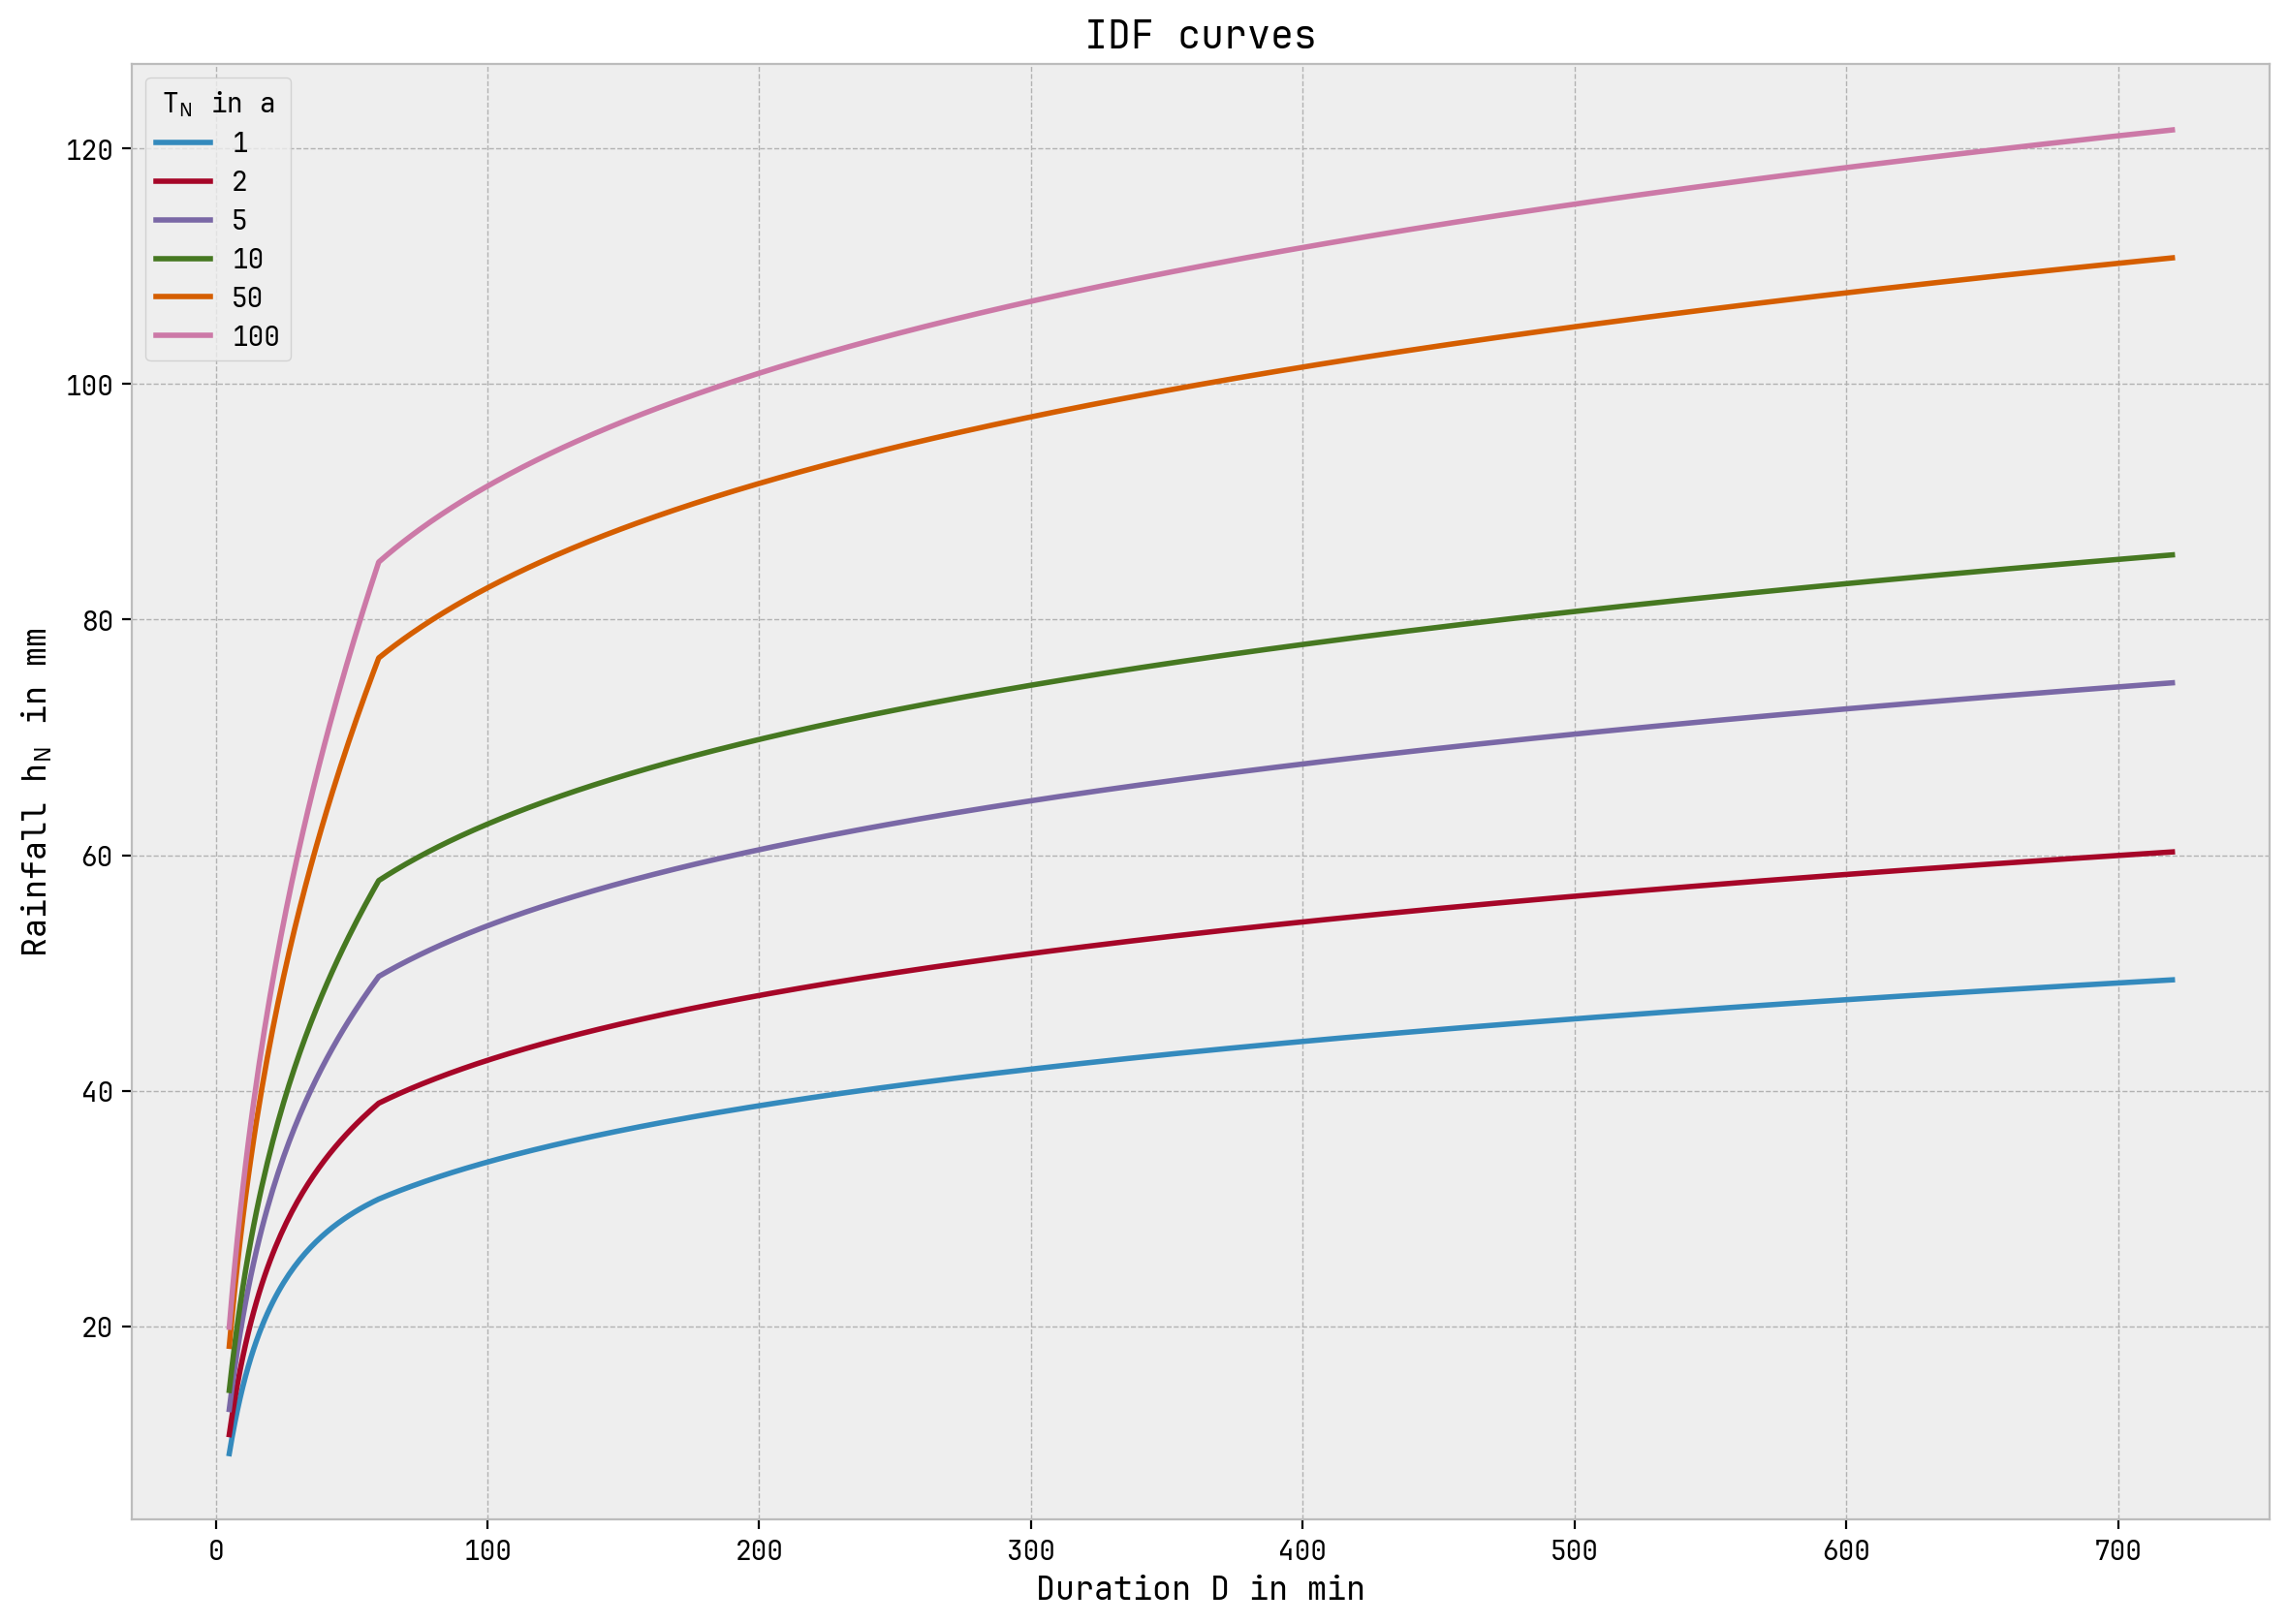

In [27]:
fig, ax = idf.result_figure(color=True, add_interim=False)

To create a black/white plot of the IDF curves:

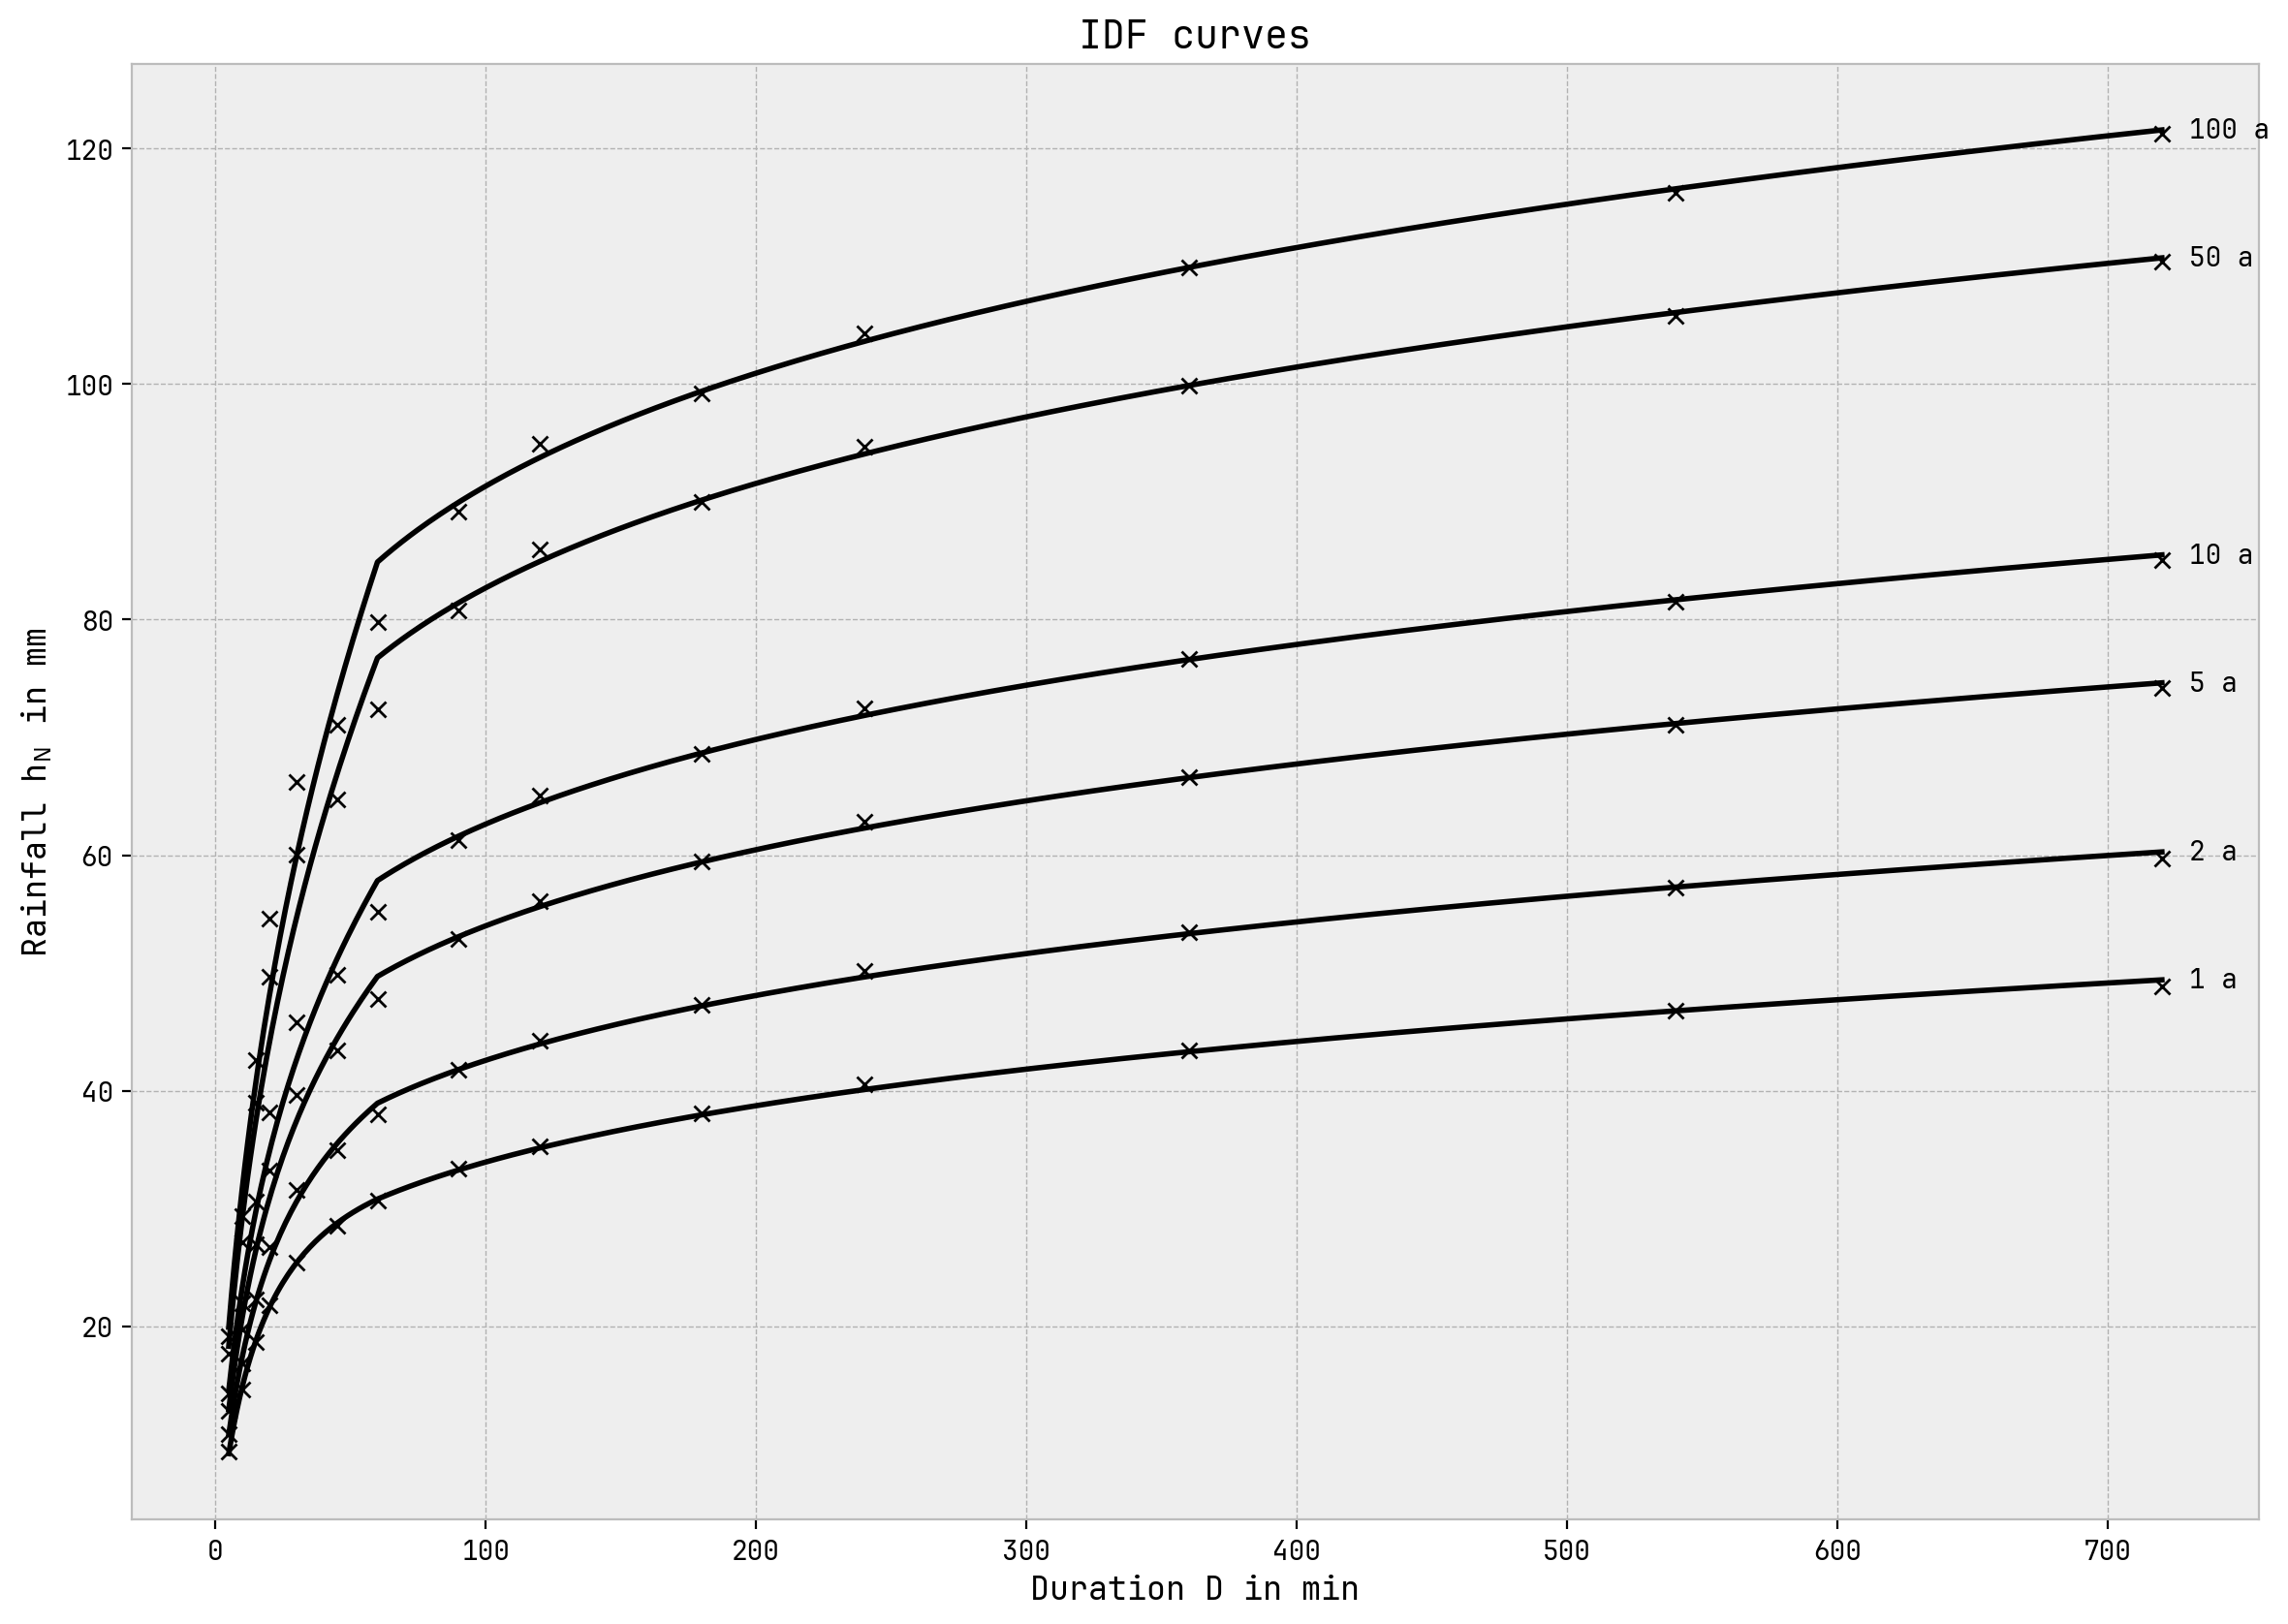

In [28]:
fig, ax = idf.result_figure(color=False, add_interim=True)